In [1]:
import pandas as pd
import numpy as np
import os

to do:

    fit more peaks to find x0
    
    compute small and large separations
    
    try gaussian fit as well?
    
    fazer um gráfico sobre as frequências mais pequenas e comentar, como no paper
    
    fazer grafico como fig 1 e fig 2 do paper 1

In [2]:
dir = "/home/rita13santos/Desktop/AstrophysicsLaboratory/StellarOscilations/DATA/"

In [3]:
count = 0
for path in os.listdir(dir):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir, path)):
        count += 1
print('File count in dir', dir, 'is: ', count)

File count in dir /home/rita13santos/Desktop/AstrophysicsLaboratory/StellarOscilations/DATA/ is:  8


# Reading and writing to an array all data from the 4 given files

In [ ]:
files=['data2calib1pm1.txt','data2calib1pm2.txt','data2calib2pm1.txt','data2calib2pm2.txt']
# 4 * 197640 = 790560 (total number of files)

data = []

for i in range(count):

    df = pd.read_fwf(dir+files[i], header=None)

    #print(df.iloc[:, 0])

    cols = []

    col1 = df.iloc[:, 0]
    col1 = col1.to_numpy()
    cols.append(col1)

    col2 = df.iloc[:, 1]
    col2 = col2.to_numpy()
    cols.append(col2)

    col3 = df.iloc[:, 2]
    col3 = col3.to_numpy()
    cols.append(col3)

    col4 = df.iloc[:, 3]
    col4 = col4.to_numpy()
    cols.append(col4)

    cols=np.transpose(cols)

    total_data = []
    for i in range(len(cols)):
        total_data = np.concatenate((total_data,cols[i]))

    print('len total data is', len(total_data))
    print('total_data=',total_data)
    
    data.append(total_data)

print(len(data))

Write all data for each calibration and photomultiplier in just one row

In [40]:
import csv

for i in range(len(data)):
    with open('DATA/data{}.csv'.format(i), 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(data[i])

# Plotting timeseries of 1st file

[0.00000000e+00 2.30216847e-04 4.60433693e-04 ... 1.81999540e+02
 1.81999770e+02 1.82000000e+02]
790560


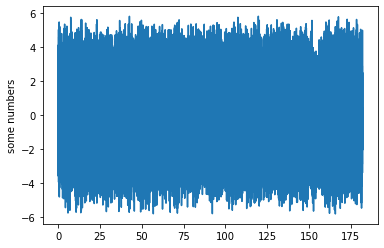

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
tips = sns.load_dataset('tips')

#183 days
plt_x = np.linspace(0, 182, 790560)
print(plt_x)
print(len(plt_x))



plt.plot(plt_x, data[0])

plt.ylabel('some numbers')
plt.show()


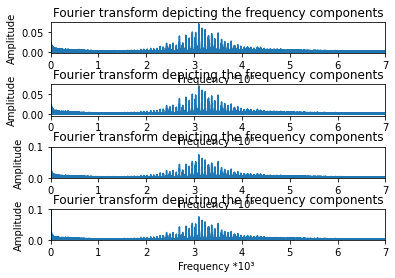

In [7]:
# From Pythonic: Applying Fourier Transform In Python Using Numpy.fft 

# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = 1/20;

# At what intervals time points are sampled
samplingInterval       = 1 / samplingFrequency;

# Begin time period of the signals
beginTime           = 0; 

# End time period of the signals
endTime             = 182; 
 
# Time points
time        = np.arange(beginTime, endTime, samplingInterval);


# Perform FFT of the 4 given files
fig, ax = plt.subplots(4, 1)
plt.subplots_adjust(hspace=1)

tpCount     = len(data[0])
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod*1000
    
    
for i in range(len(data)):
    
    # Frequency domain representation
    fourierTransform = np.fft.fft(data[i])/len(data[i])           # Normalize amplitude
    fourierTransform = fourierTransform[range(int(len(data[i])/2))] # Exclude sampling frequency



    if (i == 0 or i == 1):
        ax[i].set_xlim([0,7])
    else:
        ax[i].set_ylim([0,0.1])
        ax[i].set_xlim([0,7])
        
    ax[i].set_title('Fourier transform depicting the frequency components')

    ax[i].plot(frequencies, abs(fourierTransform))

    ax[i].set_xlabel('Frequency *10³ ')

    ax[i].set_ylabel('Amplitude')

    

plt.show()

Analysis of data[0] (this is the zone analysed in the paper)

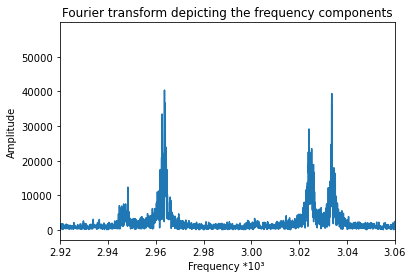

In [8]:
fourierTransform = np.fft.fft(data[0])#/len(data[0])           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(data[0])/2))] # Exclude sampling frequency

fig, ax = plt.subplots()

ax.set_xlim([2.920, 3.0600])
        
ax.set_title('Fourier transform depicting the frequency components')

ax.plot(frequencies, abs(fourierTransform))

ax.set_xlabel('Frequency *10³ ')

ax.set_ylabel('Amplitude')

plt.show()

First fit attempt

In [10]:
import math
from scipy.optimize import curve_fit

def lorentz(x, cst, x0):
    y = 1/math.pi*(cst/2)/((x-x0)**2+(cst/2)**2)
    return y

395280
2.9536025096134386
2.97257640153815
[1.80547780e-05 2.96378545e+00]


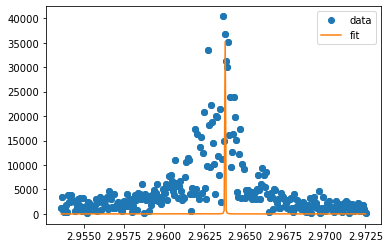

In [11]:
print(len(frequencies))
print(frequencies[46700])
print(frequencies[47000])

xdata = frequencies[46700:47000]
ydata  = abs(fourierTransform)[46700:47000]


plt.scatter(xdata, ydata)

guess = [0.00002, 2.96378]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_cst = pars[0]
fit_x0 = pars[1]

fit_y = lorentz(xdata, fit_cst, fit_x0)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

print(pars)

Redifining Fit function

In [12]:
# Define the fit function
def lorentz(x, A, sigma, x0):
    cst = 0.00001
    y = A/math.pi*(sigma)/((x-x0)**2+(sigma)**2)
    return y

def gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

2.909330095122445
3.0737704918032787
[8.97709545e+01 1.44039105e-03 2.96358585e+00]


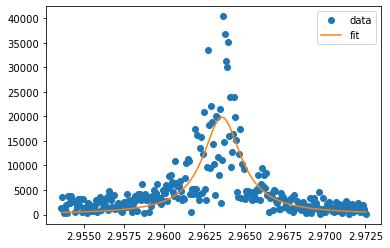

In [14]:
#print(frequencies[46000])
#print(frequencies[48600])

xdata = frequencies[46700:47000]
ydata  = abs(fourierTransform)[46700:47000]

# removing every 2 elements from array to fit
"""print(len(xdata))
xdata = np.delete(xdata, np.arange(0, xdata.size, 2))
ydata = np.delete(ydata, np.arange(0, ydata.size, 2))
print(len(xdata))"""

# fit
guess = [200, 0.0002, 2.96358]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_A = pars[0]
fit_sigma = pars[1]
fit_x0 = pars[2]

fit_y = lorentz(xdata, fit_A, fit_sigma, fit_x0)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

print(pars)

# Fit to more peaks

Fitting peaks with frequencies between 2.6563448694596232 and 3.668285772110909

In [86]:
plt.rcParams.update({'font.size': 12})    
plt.rcParams["figure.figsize"] = (10,5)

2.6563448694596232
3.668285772110909


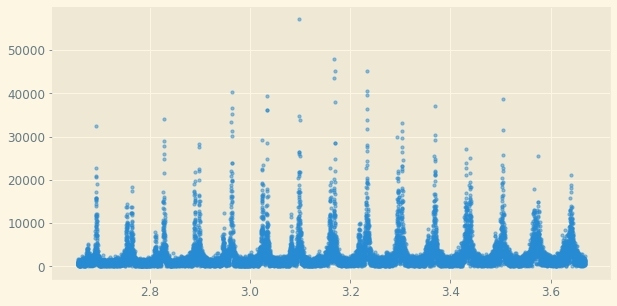

In [87]:
print(frequencies[42000])
print(frequencies[58000])

xdata = frequencies[42000:58000]
ydata  = abs(fourierTransform)[42000:58000]
with plt.style.context('Solarize_Light2'):
    plt.scatter(xdata, ydata, label='data', s=10, alpha=0.5)


plt.show()

# Computing small and large separations obtained in part I

n is ordem radial; l is graus
1 coluna      = grau, 
2 coluna      = ordem radial,
ultima coluna = frequencia propria (mHz)

# Computing small and large separations for the fitted frequencies